In [107]:
from lda import guidedlda as glda
import numpy as np

**Importing Clean Corpus**

In [108]:
import joblib
clean_corpus=joblib.load(r"C:\Users\LENOVO\Desktop\cs_concept.job")

In [109]:
import joblib
whole_corpus=joblib.load(r"C:\Users\LENOVO\Desktop\cs_concept_noisy.job")

In [110]:
import pandas as pd
labeled_corpus=pd.read_csv(r"C:\Users\LENOVO\Desktop\cs_gs.csv")
freq=labeled_corpus['freq']
terms=labeled_corpus['term']
labels=labeled_corpus['label']

In [111]:
import gensim
from gensim import corpora
dictionary=whole_corpus['dict']
docs=whole_corpus['docs']
doc_term_matrix = [dictionary.doc2bow(rev) for rev in docs]

**Creating Document Dictionary and Document-Term Matrix**

In [112]:
id2word = [[i,dictionary[i]] for i in range(len(dictionary))]
print(id2word)

[[0, 'analysis'], [1, 'artificial'], [2, 'artificial_bee_colony'], [3, 'color_information'], [4, 'cross_validation'], [5, 'explaining'], [6, 'handle'], [7, 'increase'], [8, 'linear_discriminant'], [9, 'method'], [10, 'neural_networks'], [11, 'novel'], [12, 'objective'], [13, 'principal_component'], [14, 'proposed_method'], [15, 'recall_rate'], [16, 'repetition'], [17, 'result'], [18, 'state-of-the-art'], [19, 'support_vector_machines'], [20, 'total'], [21, 'vector_machine'], [22, 'vision'], [23, 'accident'], [24, 'clinical_data'], [25, 'graphic'], [26, 'healthy_subjects'], [27, 'movement'], [28, 'present_study'], [29, 'purpose'], [30, 'quantify'], [31, 'smoothness'], [32, 'subject'], [33, 'subjects'], [34, 'viewing'], [35, 'virtual'], [36, 'amounts'], [37, 'assists'], [38, 'data_entry'], [39, 'example'], [40, 'export'], [41, 'extraction'], [42, 'implement'], [43, 'input'], [44, 'limitation'], [45, 'link'], [46, 'management_system'], [47, 'moving'], [48, 'occupancy'], [49, 'operating'],

In [113]:
dtm=[]
for i in range(len(docs)):
  doc_counts=[]
  for j in range(len(dictionary)):
    if (dictionary[j] in docs[i]):
      doc_counts.append(1)
    else:
      doc_counts.append(0)
  dtm.append(doc_counts)

In [114]:
dtm=np.array(dtm)
print(dtm.shape)
print(dtm.sum())

(5746, 8261)
102103


In [115]:
print(len(dictionary))
print(len(docs))

8261
5746


**Computing TF-IDF of Core Concepts**

In [116]:
terms_list=[]
for term in terms:
    terms_list.append(term)

In [117]:
vocab=tuple(dictionary[i] for i in range(len(dictionary)))
print(vocab)

('analysis', 'artificial', 'artificial_bee_colony', 'color_information', 'cross_validation', 'explaining', 'handle', 'increase', 'linear_discriminant', 'method', 'neural_networks', 'novel', 'objective', 'principal_component', 'proposed_method', 'recall_rate', 'repetition', 'result', 'state-of-the-art', 'support_vector_machines', 'total', 'vector_machine', 'vision', 'accident', 'clinical_data', 'graphic', 'healthy_subjects', 'movement', 'present_study', 'purpose', 'quantify', 'smoothness', 'subject', 'subjects', 'viewing', 'virtual', 'amounts', 'assists', 'data_entry', 'example', 'export', 'extraction', 'implement', 'input', 'limitation', 'link', 'management_system', 'moving', 'occupancy', 'operating', 'outside', 'package', 'practitioner', 'processing', 'record', 'researcher', 'spatial', 'spatial_distribution', 'tags', 'toolbox', '2016', 'catchment', 'characteristic', 'conservation', 'copyright', 'cross', 'discover', 'entropy', 'geology', 'groundwater', 'guide', 'heterogeneous_environme

In [118]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer
#compute term counts in text
word_counts=[]
for term in vocab:
    i=terms_list.index(term)
    word_counts.append(freq[i])
#compute number of documents that contain each term
doc_term_counts=[]
for i in range(len(dictionary)):
    count=0
    for j in range(len(docs)):
        if (dtm[j][i]!=0):
            count=count+1
    doc_term_counts.append(count)
#compute TFIDF of terms
tfidf=[]
for i in range(len(dictionary)):
    tfidf.append((word_counts[i]*len(docs))/(len(dictionary)*doc_term_counts[i]))
print(tfidf)

[0.9290144335182324, 0.8266044922097722, 1.391114877133519, 0.6955574385667594, 0.9484874162273993, 0.8025662752693379, 0.7480523395906659, 0.8057447555674342, 0.9563914780292943, 1.0582751062729647, 1.035607741866064, 0.7083199603753239, 0.6955574385667594, 0.8641774236738526, 0.8763598308547551, 0.9274099180890126, 0.8942881353001193, 0.8369199212269294, 0.772582255589253, 0.8536386746046594, 0.7459601515063797, 0.8971682903252405, 0.8239321336042487, 0.8694467982084494, 0.8346689262801114, 0.7760351587315085, 1.1592623976112657, 0.8578541742323367, 0.7949227869334394, 0.7190031949229424, 0.7809767731275896, 1.0930188320334793, 0.8832475410371549, 0.6955574385667594, 0.7490618569180486, 0.7651131824234354, 0.711733192952033, 0.6955574385667594, 1.391114877133519, 0.7469895026861325, 0.6955574385667594, 0.9251589231421946, 0.7486534262436113, 0.934655308074083, 0.7495231019038356, 0.8316447635037342, 0.9677320884407088, 0.881039422184562, 1.8084493402735746, 0.9301537344147197, 0.7271

In [119]:
word2id = { dictionary[i] : i for i in range(len(dictionary))}

In [120]:
#determining term counts of core concepts
core_concepts=['data_structures','cryptography','software_engineering','computer_graphics','network_security','computer_programming','algorithm_design','operating_systems','distributed_computing','machine_learning']
core_concepts_counts={}
for core_concept in core_concepts:
    index=word2id[core_concept]
    core_concepts_counts[core_concept]=word_counts[index]
print(core_concepts_counts)

{'data_structures': 223, 'cryptography': 727, 'software_engineering': 546, 'computer_graphics': 141, 'network_security': 354, 'computer_programming': 259, 'algorithm_design': 237, 'operating_systems': 158, 'distributed_computing': 258, 'machine_learning': 291}


In [121]:
#determining TF-IDF of core concepts
core_concepts_tfidf={}
for core_concept in core_concepts:
    index=word2id[core_concept]
    core_concepts_tfidf[core_concept]=tfidf[index]
print(core_concepts_tfidf)

{'data_structures': 0.9017983069789963, 'cryptography': 2.5538901911011824, 'software_engineering': 2.098200892030114, 'computer_graphics': 1.886030746882944, 'network_security': 2.1984583326127933, 'computer_programming': 1.7322055441229876, 'algorithm_design': 1.7725496015088387, 'operating_systems': 0.7906336352053813, 'distributed_computing': 2.5275185795806188, 'machine_learning': 3.212812930522651}


In [122]:
seed_topics=[['data_structures', 'binary_search_tree', 'data_retrieval','graphs'],
                   ['cryptography', 'cypher', 'hash','encryption_key'], 
                   ['software_engineering', 'software_environment', 'software_module', 'malwares'],
                   ['computer_graphics', 'graph_partitioning', 'digital_image_processing', 'binary_image'],
                   ['network_security', 'network_lifetime', 'channel_attack', 'relay_networks'],
                   ['computer_programming','programming_approach','function_calls','debugging'],
                   ['algorithm_design','continuous_optimization','inference_algorithm','linearized_model'],
                   ['operating_systems','robust_system','virtual_platform','android'],
                   ['distributed_computing','web_service','gpu_parallel_computing','cloud_computing_platform'],
                   ['machine_learning','statistical_learning','unsupervised_approach','deep_learning_algorithm']]

**Visualizing Terms Measure**

In [123]:
import pandas as pd
df_terms=pd.DataFrame(vocab,columns=['terms'])
df_terms['frequency']=freq
df_terms['TF-IDF']=tfidf
print(df_terms)

                            terms  frequency    TF-IDF
0                        analysis          3  0.929014
1                      artificial         10  0.826604
2           artificial_bee_colony          5  1.391115
3               color_information          4  0.695557
4                cross_validation          4  0.948487
...                           ...        ...       ...
8256                         makd          6  2.086672
8257                        simit          3  2.434451
8258              memory_contents          8  1.043336
8259  computer_network_technology          3  0.869447
8260                  word_clouds         12  2.782230

[8261 rows x 3 columns]


In [124]:
filtered_terms=[]
for i in range(len(vocab)):
    if tfidf[i]>3.3:
        filtered_terms.append(vocab[i])
print(filtered_terms)

['operating_system', 'multi-proxy_signature', 'uncertainty_measures', 'scoping', 'sanger', 'secondary_studies', 'technical_debt', 'ontology_matching', 'socialbots', 'owl_ontologies', 'geoweb', 'grinding', 'security_game', 'electronic_voting', 'mocas', 'command_queue', 'pretreatment', 'mechatronic_system', 'flame', 'faulty_element', 'lisa', 'memif', 'z-wave']


**Filtering Terms**

In [125]:
#Determining the most general terms
tfidf_max= 3.3 
general_words_ids = []
for i in range(len(dictionary)):
    general_words_ids += [id for id,value in enumerate(tfidf) if (value > tfidf_max)]
#Filter Out of the Dictionary
#dictionary.filter_tokens(bad_ids=general_words_ids)


In [126]:
# Filtering low-frequent terms
#dictionary.filter_extremes(no_below=2, no_above=1.0)

In [127]:
print(len(dictionary))

8261


**Computing New Document-Term distribution after Filtering**

In [128]:
vocab=tuple(dictionary[i] for i in range(len(dictionary)))
print(vocab)

('analysis', 'artificial', 'artificial_bee_colony', 'color_information', 'cross_validation', 'explaining', 'handle', 'increase', 'linear_discriminant', 'method', 'neural_networks', 'novel', 'objective', 'principal_component', 'proposed_method', 'recall_rate', 'repetition', 'result', 'state-of-the-art', 'support_vector_machines', 'total', 'vector_machine', 'vision', 'accident', 'clinical_data', 'graphic', 'healthy_subjects', 'movement', 'present_study', 'purpose', 'quantify', 'smoothness', 'subject', 'subjects', 'viewing', 'virtual', 'amounts', 'assists', 'data_entry', 'example', 'export', 'extraction', 'implement', 'input', 'limitation', 'link', 'management_system', 'moving', 'occupancy', 'operating', 'outside', 'package', 'practitioner', 'processing', 'record', 'researcher', 'spatial', 'spatial_distribution', 'tags', 'toolbox', '2016', 'catchment', 'characteristic', 'conservation', 'copyright', 'cross', 'discover', 'entropy', 'geology', 'groundwater', 'guide', 'heterogeneous_environme

In [129]:
new_docs=[]
for doc in docs:
    new_doc=[]
    for word in doc:
        if(word in vocab):
            new_doc.append(word)
    new_docs.append(new_doc)

In [130]:
new_dtm=[]
for i in range(len(new_docs)):
  doc_counts=[]
  for j in range(len(dictionary)):
    if (dictionary[j] in new_docs[i]):
      doc_counts.append(1)
    else:
      doc_counts.append(0)
  new_dtm.append(doc_counts)

In [131]:
new_dtm=np.array(new_dtm)
print(new_dtm.shape)
print(new_dtm.sum())

(5746, 8261)
102103


**Creating Seeded LDA Model**

In [132]:
seed_topic_list = [['data_structures', 'binary_search_tree', 'data_retrieval','graphs'],
                   ['cryptography', 'cypher', 'hash','encryption_key'], 
                   ['software_engineering', 'software_environment', 'software_module', 'malwares'],
                   ['computer_graphics', 'graph_partitioning', 'digital_image_processing', 'binary_image'],
                   ['network_security', 'network_lifetime', 'channel_attack', 'relay_networks'],
                   ['computer_programming','programming_approach','function_calls','debugging'],
                   ['algorithm_design','continuous_optimization','inference_algorithm','linearized_model'],
                   ['operating_systems','robust_system','virtual_platform','android'],
                   ['distributed_computing','web_service','gpu_parallel_computing','cloud_computing_platform'],
                   ['machine_learning','statistical_learning','unsupervised_approach','deep_learning_algorithm']]

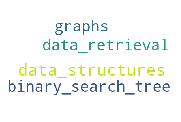

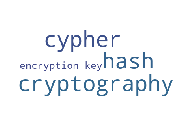

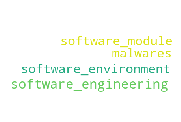

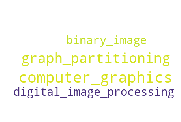

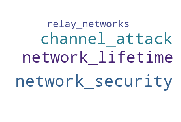

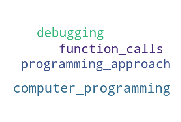

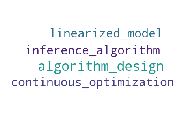

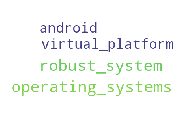

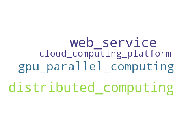

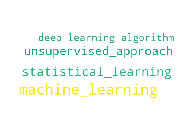

In [133]:
#visualize seed topics list 
import matplotlib.pyplot as pPlot
from wordcloud import WordCloud, STOPWORDS
import numpy as npy
from PIL import Image
import matplotlib.pyplot as plt
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(3,3))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
def create_word_cloud(string):
        maskArray = npy.array(Image.open("cloud.png"))
        cloud = WordCloud(background_color = "white", max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
        cloud.generate(string)
        cloud.to_file("wordCloud.png")
        plot_cloud(cloud)
for seed_topic in seed_topic_list:
    seed_topic_string=' '.join([term for term in seed_topic])
    create_word_cloud(seed_topic_string)

In [134]:
model = glda.GuidedLDA(n_topics=10, n_iter=100, random_state=7, refresh=20)

In [135]:
word2id = { dictionary[i] : i for i in range(len(dictionary))}

In [136]:
seed_topics = {}
for t_id, st in enumerate(seed_topic_list):
     for word in st:
         seed_topics[word2id[word]] = t_id

In [137]:
print(seed_topics)

{353: 0, 6235: 0, 1056: 0, 3897: 0, 639: 1, 7526: 1, 3511: 1, 3808: 1, 1282: 2, 6109: 2, 4550: 2, 6231: 2, 2440: 3, 7277: 3, 1030: 3, 4692: 3, 898: 4, 1615: 4, 8198: 4, 6994: 4, 1966: 5, 6025: 5, 7236: 5, 1340: 5, 438: 6, 3107: 6, 7758: 6, 1159: 6, 530: 7, 3564: 7, 7825: 7, 1888: 7, 2697: 8, 4314: 8, 6352: 8, 6451: 8, 605: 9, 5808: 9, 4389: 9, 5171: 9}


In [138]:
model.fit(new_dtm, seed_topics=seed_topics, seed_confidence=0.7)

INFO:lda:n_documents: 5746
INFO:lda:vocab_size: 8261
INFO:lda:n_words: 102103
INFO:lda:n_topics: 10
INFO:lda:n_iter: 100
INFO:lda:<0> log likelihood: -1346729
INFO:lda:<20> log likelihood: -921178
INFO:lda:<40> log likelihood: -901042
INFO:lda:<60> log likelihood: -889592
INFO:lda:<80> log likelihood: -881462
INFO:lda:<99> log likelihood: -875577


**Topic-Word Distributions (Top 20 Words)**

In [139]:
print(len(vocab))

8261


In [140]:
print(len(dictionary))

8261


In [141]:
n_top_words = 50
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
     topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
     print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: result present analysis 2016 data_structures operating propose relational technique processing implement operation parallel data 2015 paper_presents running elsevier_b.v._all_rights query method uses analyzing finally mean performing term variety current extend computer form challenge increase foci complexity based distributed elsevier_ltd._all_rights linux complex instance collection machine construct example data_set simple chain possibility capability
Topic 1: cryptography propose result present encryption secure 2016 term analysis quanta method uses proposed_scheme complexity computational furthermore sons et_al. john_wiley ltd. copyright paper_presents technique experimental_result increase quantum_cryptography fpga cipher secret_key elliptic_curve_cryptography fast embedding based array bound share offer construct finally robust advantage elliptic_curve 2017 compared adversary decryption fact property exploit compare
Topic 2: engineering result software_engineering prese

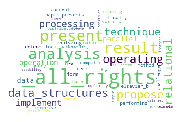

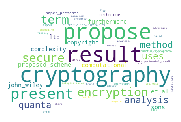

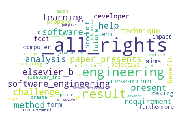

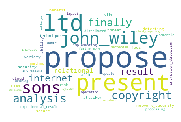

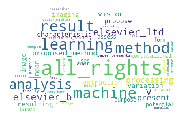

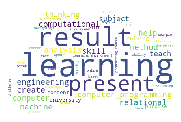

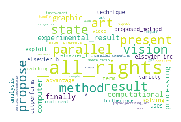

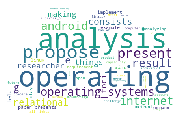

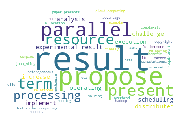

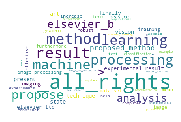

In [142]:
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    seed_topic_string=' '.join([term for term in topic_words])
    create_word_cloud(seed_topic_string)

**Saving Seeded LDA Model**

In [143]:
from six.moves import cPickle as pickle
with open('guidedlda_model.pickle', 'wb') as file_handle:
     pickle.dump(model, file_handle)

**Evaluation**

In [144]:
beta=model.topic_word_
theta=model.transform(new_dtm)
logs=model.loglikelihoods_
print(logs)

[-1346728.7302988248, -921178.2147164315, -901041.9159765346, -889591.5758010605, -881461.6313273335]


In [145]:
theta=np.asarray(theta)
print(theta.shape)
docs_length=[]
for doc in docs:
  docs_length.append(len(doc))

(5746, 10)


In [146]:
from sklearn import preprocessing
normalized_theta=preprocessing.normalize(theta, norm='l2')
  

**Computing Term Frequency of Core Concepts**

In [147]:
#Compute term_frequency
topic_freq= (theta.T * docs_length).T.sum()
term_topic_freq = (beta.T * topic_freq).T
term_frequency = np.sum(term_topic_freq, axis=0)
print(term_frequency)

[10853.402866     838.4715473     62.49317342 ...    35.18192998
    51.82280905    17.79839592]


In [148]:
core_concepts=['data_structures','cryptography','software_engineering','computer_graphics','network_security','computer_programming','algorithm_design','operating_systems','distributed_computing','machine_learning']
core_concepts_freq={}
for core_concept in core_concepts:
    index=word2id[core_concept]
    core_concepts_freq[core_concept]=term_frequency[index]
print(core_concepts_freq)

{'data_structures': 2170.9594421185097, 'cryptography': 2874.2643815093174, 'software_engineering': 2064.267046896593, 'computer_graphics': 621.1158912365482, 'network_security': 1713.0756229318965, 'computer_programming': 1520.8544001406046, 'algorithm_design': 1062.6952794151662, 'operating_systems': 1989.332904890316, 'distributed_computing': 677.8755327137357, 'machine_learning': 674.0698636156336}


**Computing Saliency of Core Concepts**

In [149]:
# compute the distinctiveness and saliency of the terms:
# this determines the R terms that are displayed when no topic is selected
term_proportion = term_frequency / term_frequency.sum()
topic_proportion = (topic_freq / topic_freq.sum())
topic_given_term = beta /beta.sum()
kernel = (topic_given_term* np.log((topic_given_term.T / topic_proportion).T))
distinctiveness = kernel.sum()
saliency = term_proportion * distinctiveness

In [150]:
#compute term counts in text
word_counts=[]
for term in vocab:
    i=terms_list.index(term)
    word_counts.append(freq[i])
#compute number of documents that contain each term
doc_term_counts=[]
for i in range(len(dictionary)):
    count=0
    for j in range(len(docs)):
        if (dtm[j][i]!=0):
            count=count+1
    doc_term_counts.append(count)
#computing tf-idf after filtering
tfidf=[]
for i in range(len(dictionary)):
    tfidf.append((word_counts[i]*len(docs))/(len(dictionary)*doc_term_counts[i])) 

In [151]:
new_docs=[]
for doc in docs:
    new_doc=[]
    for word in doc:
        if(word in vocab):
            new_doc.append(word)
    new_docs.append(new_doc)
new_dtm=[]
for i in range(len(new_docs)):
  doc_counts=[]
  for j in range(len(dictionary)):
    if (dictionary[j] in new_docs[i]):
      doc_counts.append(1)
    else:
      doc_counts.append(0)
  new_dtm.append(doc_counts)
new_dtm=np.array(new_dtm)

In [152]:
#determining measures of all terms
terms_saliency={}
for term in vocab:
    index=word2id[term]
    terms_saliency[term]=saliency[index]
df_terms=pd.DataFrame(vocab,columns=['Terms'])
df_terms['TF-IDF']=tfidf
df_terms['term counts']=word_counts
df_terms['Saliency']=terms_saliency.values()
print(df_terms)

                            Terms    TF-IDF  term counts  Saliency
0                        analysis  0.929014         1158 -0.078970
1                      artificial  0.826604           82 -0.006101
2           artificial_bee_colony  1.391115           12 -0.000455
3               color_information  0.695557            4 -0.000319
4                cross_validation  0.948487           15 -0.000808
...                           ...       ...          ...       ...
8256                         makd  2.086672            6 -0.000219
8257                        simit  2.434451            7 -0.000160
8258              memory_contents  1.043336            3 -0.000256
8259  computer_network_technology  0.869447            5 -0.000377
8260                  word_clouds  2.782230            8 -0.000130

[8261 rows x 4 columns]


In [153]:
core_concepts_saliency={}
for core_concept in core_concepts:
    index=word2id[core_concept]
    core_concepts_saliency[core_concept]=saliency[index]
print(core_concepts_saliency)

{'data_structures': -0.01579600920086729, 'cryptography': -0.02091329102479285, 'software_engineering': -0.015019710010798883, 'computer_graphics': -0.004519270209490089, 'network_security': -0.012464423690572358, 'computer_programming': -0.01106581248443659, 'algorithm_design': -0.007732223866411531, 'operating_systems': -0.014474485455412816, 'distributed_computing': -0.004932256192377299, 'machine_learning': -0.004904565954170723}


**Computing Relevance of Core Concepts**

In [154]:
word2id = { dictionary[i] : i for i in range(len(dictionary))}

In [155]:
#converting distribution matrices into dataframes
def _df_with_names(data, index_name, columns_name):
   if type(data) == pd.DataFrame:
      # we want our index to be numbered
      df = pd.DataFrame(data.values)
   else:
      df = pd.DataFrame(data)
   df.index.name = index_name
   df.columns.name = columns_name
   return df
## compute relevance each topic
topic_term_dists = _df_with_names(beta, 'topic', 'term')
doc_topic_dists  = _df_with_names(beta, 'doc', 'topic')
log_lift = np.log(topic_term_dists / term_proportion)
log_ttd = np.log(topic_term_dists)
R=len(vocab)
def _find_relevance(log_ttd, log_lift, R, lambda_):
   relevance_measure= lambda_ * log_ttd + (1 - lambda_) * log_lift
   return relevance_measure.T
relevance_0=_find_relevance(log_ttd, log_lift, R, lambda_=0)

In [156]:
relevance_1=_find_relevance(log_ttd, log_lift, R, lambda_=0.5)

In [157]:
relevance_2=_find_relevance(log_ttd, log_lift, R, lambda_=1)

In [158]:
print(relevance_0)

topic         0         1         2         3         4         5         6  \
term                                                                          
0      0.166995 -0.088798  0.003307  0.012776  0.275977  0.012326 -0.629079   
1     -6.388491 -6.367567 -6.695265 -6.159037  0.621798  1.716693 -6.734212   
2      1.511337 -3.771043 -4.098742 -3.562513 -3.872588 -3.726264 -4.137688   
3     -3.436570 -3.415646 -3.743344 -3.207115  1.786115 -3.370866 -3.782290   
4     -4.367125 -4.346201 -4.673899 -4.137671  1.546216 -4.301422 -4.712846   
...         ...       ...       ...       ...       ...       ...       ...   
8256  -3.060485  2.263744 -3.367259 -2.831031 -3.141106 -2.994781 -3.406206   
8257  -2.749278 -2.728354  2.247253 -2.519824 -2.829899 -2.683575 -3.094999   
8258  -3.217443 -3.196519 -3.524217 -2.987989 -3.298063 -3.151739 -3.563163   
8259   2.102369 -3.583816 -3.911515 -3.375286 -3.685361 -3.539037 -3.950461   
8260  -2.536019 -2.515094 -2.842793 -2.306564 -2.616

In [159]:
# Determining relevance of core concepts
topics=['topic 0','topic 1','topic 2','topic 3','topic 4','topic 5','topic 6','topic 7','topic 8','topic 9']
df_relevance_0=pd.DataFrame(topics,columns=['topics\core concepts'])
for core_concept in core_concepts:
    index=word2id[core_concept]
    df_relevance_0.insert(1,core_concept,relevance_0.loc[index])
print(df_relevance_0)

<>:3: DeprecationWarning: invalid escape sequence \c
<>:3: DeprecationWarning: invalid escape sequence \c
<ipython-input-159-13c7942228a7>:3: DeprecationWarning: invalid escape sequence \c
  df_relevance_0=pd.DataFrame(topics,columns=['topics\core concepts'])


  topics\core concepts  machine_learning  distributed_computing  \
0              topic 0         -6.170244              -6.175874   
1              topic 1         -6.149320              -0.447839   
2              topic 2         -6.477018              -6.482648   
3              topic 3         -5.940790              -5.946420   
4              topic 4          1.063022              -0.549384   
5              topic 5          0.986370              -6.110170   
6              topic 6         -6.515965              -6.521595   
7              topic 7         -5.985875              -5.991505   
8              topic 8         -6.602738               2.171343   
9              topic 9          1.483799              -6.710798   

   operating_systems  algorithm_design  computer_programming  \
0           0.444202          0.378500             -6.983938   
1          -7.231541         -0.897439             -6.963014   
2          -1.160644         -6.932248             -0.604851   
3     

In [160]:
# Determining relevance of core concepts
topics=['topic 0','topic 1','topic 2','topic 3','topic 4','topic 5','topic 6','topic 7','topic 8','topic 9']
df_relevance_1=pd.DataFrame(topics,columns=['topics\core concepts'])
for core_concept in core_concepts:
    index=word2id[core_concept]
    df_relevance_1.insert(1,core_concept,relevance_1.loc[index])
print(df_relevance_1)

  topics\core concepts  machine_learning  distributed_computing  \
0              topic 0         -9.931093              -9.933908   
1              topic 1         -9.910169              -4.205873   
2              topic 2        -10.237867             -10.240682   
3              topic 3         -9.701639              -9.704454   
4              topic 4         -2.697827              -4.307418   
5              topic 5         -2.774479              -9.868204   
6              topic 6        -10.276814             -10.279628   
7              topic 7         -9.746724              -9.749539   
8              topic 8        -10.363587              -1.586691   
9              topic 9         -2.277050             -10.468832   

   operating_systems  algorithm_design  computer_programming  \
0          -2.775536         -3.154734            -10.337940   
1         -10.451279         -4.430673            -10.317016   
2          -4.380382        -10.465482             -3.958853   
3     

<>:3: DeprecationWarning: invalid escape sequence \c
<>:3: DeprecationWarning: invalid escape sequence \c
<ipython-input-160-a46f3be7eb2a>:3: DeprecationWarning: invalid escape sequence \c
  df_relevance_1=pd.DataFrame(topics,columns=['topics\core concepts'])


In [161]:
# Determining relevance of core concepts
topics=['topic 0','topic 1','topic 2','topic 3','topic 4','topic 5','topic 6','topic 7','topic 8','topic 9']
df_relevance_2=pd.DataFrame(topics,columns=['topics\core concepts'])
for core_concept in core_concepts:
    index=word2id[core_concept]
    df_relevance_2.insert(1,core_concept,relevance_2.loc[index])
print(df_relevance_2)

<>:3: DeprecationWarning: invalid escape sequence \c
<>:3: DeprecationWarning: invalid escape sequence \c
<ipython-input-161-b0d704f4c5c1>:3: DeprecationWarning: invalid escape sequence \c
  df_relevance_2=pd.DataFrame(topics,columns=['topics\core concepts'])


  topics\core concepts  machine_learning  distributed_computing  \
0              topic 0        -13.691942             -13.691942   
1              topic 1        -13.671018              -7.963907   
2              topic 2        -13.998716             -13.998716   
3              topic 3        -13.462488             -13.462488   
4              topic 4         -6.458676              -8.065452   
5              topic 5         -6.535328             -13.626238   
6              topic 6        -14.037662             -14.037662   
7              topic 7        -13.507573             -13.507573   
8              topic 8        -14.124436              -5.344725   
9              topic 9         -6.037899             -14.226866   

   operating_systems  algorithm_design  computer_programming  \
0          -5.995275         -6.687968            -13.691942   
1         -13.671018         -7.963907            -13.671018   
2          -7.600121        -13.998716             -7.312855   
3     

**Filtering Terms according to their relevance**

In [162]:
low_relevance_terms=[]
low_relevance_ids=[]
for i in range(len(vocab)):
    term_relevance=relevance_0.loc[i]
    if (max(term_relevance)<2):
        low_relevance_ids.append(i)
        low_relevance_terms.append(id2word[i])
print(low_relevance_terms)

[[0, 'analysis'], [1, 'artificial'], [2, 'artificial_bee_colony'], [3, 'color_information'], [4, 'cross_validation'], [5, 'explaining'], [6, 'handle'], [7, 'increase'], [9, 'method'], [10, 'neural_networks'], [11, 'novel'], [12, 'objective'], [13, 'principal_component'], [14, 'proposed_method'], [15, 'recall_rate'], [16, 'repetition'], [17, 'result'], [18, 'state-of-the-art'], [19, 'support_vector_machines'], [20, 'total'], [21, 'vector_machine'], [22, 'vision'], [24, 'clinical_data'], [25, 'graphic'], [27, 'movement'], [28, 'present_study'], [29, 'purpose'], [30, 'quantify'], [32, 'subject'], [34, 'viewing'], [35, 'virtual'], [36, 'amounts'], [38, 'data_entry'], [39, 'example'], [41, 'extraction'], [42, 'implement'], [43, 'input'], [44, 'limitation'], [45, 'link'], [46, 'management_system'], [47, 'moving'], [48, 'occupancy'], [49, 'operating'], [50, 'outside'], [51, 'package'], [53, 'processing'], [54, 'record'], [55, 'researcher'], [56, 'spatial'], [57, 'spatial_distribution'], [59, 

In [163]:
print(len(low_relevance_terms))

3738


In [164]:
count=0
for term in low_relevance_terms:
    term=term[1]
    labels=labeled_corpus['label']
    terms=labeled_corpus['term']
    terms=list(terms)
    id=terms.index(term)
    if(labels[id]=='o'):
        count=count+1
print(count)

2901


In [165]:
#Filter Out of the Dictionary
dictionary.filter_tokens(bad_ids=low_relevance_ids)

In [166]:
vocab=tuple(dictionary[i] for i in range(len(dictionary)))

In [167]:
#compute term counts in text
word_counts=[]
for term in vocab:
    i=terms_list.index(term)
    word_counts.append(freq[i])
#compute number of documents that contain each term
doc_term_counts=[]
for i in range(len(dictionary)):
    count=0
    for j in range(len(docs)):
        if (dtm[j][i]!=0):
            count=count+1
    doc_term_counts.append(count)
doc_term_counts=np.array(doc_term_counts)
#computing tf-idf after filtering
new_tfidf=[]
for i in range(len(dictionary)):
    new_tfidf.append((word_counts[i]*len(docs))/(len(dictionary)*doc_term_counts[i]))    

In [168]:
#computing new document-term matrix
new_dtm=[]
for i in range(len(new_docs)):
  doc_counts=[]
  for j in range(len(dictionary)):
    if (dictionary[j] in new_docs[i]):
      doc_counts.append(1)
    else:
      doc_counts.append(0)
  new_dtm.append(doc_counts)
new_dtm=np.array(new_dtm)

In [169]:
model.fit(new_dtm, seed_topics=seed_topics, seed_confidence=0.7)

INFO:lda:n_documents: 5746
INFO:lda:vocab_size: 4523
INFO:lda:n_words: 21827
INFO:lda:n_topics: 10
INFO:lda:n_iter: 100
INFO:lda:<0> log likelihood: -319682
INFO:lda:<20> log likelihood: -201237
INFO:lda:<40> log likelihood: -196369
INFO:lda:<60> log likelihood: -194239
INFO:lda:<80> log likelihood: -193478
INFO:lda:<99> log likelihood: -192191


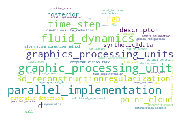

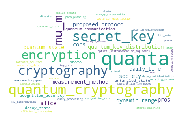

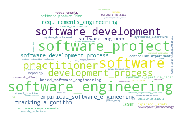

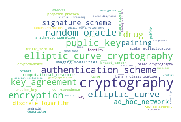

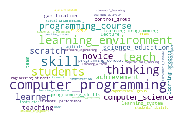

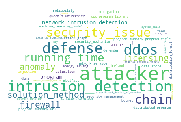

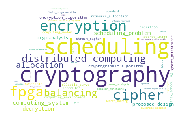

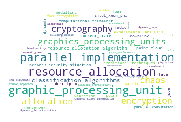

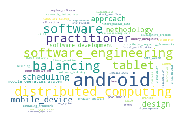

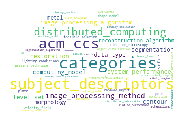

In [170]:
n_top_words = 50
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    seed_topic_string=' '.join([term for term in topic_words])
    create_word_cloud(seed_topic_string)

In [172]:
beta=model.topic_word_
theta=model.transform(new_dtm)
from sklearn import preprocessing
normalized_theta=preprocessing.normalize(theta, norm='l2')

In [173]:
for core_concept in core_concepts:
    index=word2id[core_concept]
    core_concepts_saliency[core_concept]=saliency[index]
print(core_concepts_saliency)

{'data_structures': -0.01579600920086729, 'cryptography': -0.02091329102479285, 'software_engineering': -0.015019710010798883, 'computer_graphics': -0.004519270209490089, 'network_security': -0.012464423690572358, 'computer_programming': -0.01106581248443659, 'algorithm_design': -0.007732223866411531, 'operating_systems': -0.014474485455412816, 'distributed_computing': -0.004932256192377299, 'machine_learning': -0.004904565954170723}


**Plot Of Dominant Topics**

In [174]:
from pandas import DataFrame
df_document_topic= DataFrame(theta,columns=['Topic 1','Topic 2','Topic 3','Topic 4','Topic 5','Topic 6','Topic 7','Topic 8','Topic 9','Topic 10'])
df_document_topic['dominant_topic'] = np.argmax(df_document_topic.values, axis=1)
df_document_topic.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,dominant_topic
0,0.001155,0.001578,0.989054,0.001182,0.001116,0.001067,0.001083,0.001381,0.001246,0.001137,2
1,0.000022,0.000030,0.499577,0.000023,0.000021,0.000020,0.000021,0.000026,0.000024,0.500235,9
2,0.003744,0.000023,0.002603,0.000017,0.001054,0.000321,0.046038,0.511171,0.435012,0.000017,7
3,0.000040,0.000055,0.000043,0.000041,0.000039,0.992166,0.007487,0.000048,0.000043,0.000039,5
4,0.999829,0.000025,0.000019,0.000018,0.000017,0.000017,0.000017,0.000021,0.000019,0.000018,0


In [175]:
from pandas import DataFrame
df_document_topic_term= DataFrame(beta.transpose(),columns=['Topic 1','Topic 2','Topic 3','Topic 4','Topic 5','Topic 6','Topic 7','Topic 8','Topic 9','Topic 10'])
df_document_topic_term['dominant_topic'] = np.argmax(df_document_topic_term.values, axis=1)
df_document_topic_term['terms']=vocab
df_document_topic_term.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,dominant_topic,terms
0,0.000004,0.000006,0.003693,0.000004,0.000004,0.000004,0.000004,0.000005,0.000005,0.000004,2,linear_discriminant
1,0.000004,0.000006,0.000005,0.000004,0.000004,0.000004,0.000004,0.000005,0.000005,0.001702,9,accident
2,0.000004,0.000006,0.001388,0.000004,0.000004,0.000004,0.000004,0.000005,0.000005,0.000004,2,healthy_subjects
3,0.000004,0.000006,0.000005,0.000004,0.000004,0.000004,0.000004,0.000005,0.000005,0.002975,9,smoothness
4,0.000004,0.000006,0.002310,0.000004,0.000004,0.000004,0.000004,0.000005,0.000005,0.000004,2,subjects


In [176]:
df_document_topic_term.head(10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,dominant_topic,terms
0,0.000004,0.000006,0.003693,0.000004,0.000004,0.000004,0.000004,0.000005,0.000005,0.000004,2,linear_discriminant
1,0.000004,0.000006,0.000005,0.000004,0.000004,0.000004,0.000004,0.000005,0.000005,0.001702,9,accident
2,0.000004,0.000006,0.001388,0.000004,0.000004,0.000004,0.000004,0.000005,0.000005,0.000004,2,healthy_subjects
3,0.000004,0.000006,0.000005,0.000004,0.000004,0.000004,0.000004,0.000005,0.000005,0.002975,9,smoothness
4,0.000004,0.000006,0.002310,0.000004,0.000004,0.000004,0.000004,0.000005,0.000005,0.000004,2,subjects
5,0.000004,0.000006,0.000005,0.000004,0.000838,0.000004,0.000812,0.000005,0.002331,0.000004,8,assists
6,0.000004,0.000006,0.000005,0.000004,0.000004,0.000402,0.000004,0.003099,0.000005,0.000004,7,export
7,0.000004,0.000006,0.010146,0.000004,0.000004,0.000004,0.000004,0.001036,0.008380,0.000004,2,practitioner
8,0.002161,0.000006,0.000005,0.000004,0.000004,0.000004,0.002833,0.001036,0.000005,0.000004,6,tags
9,0.000004,0.000006,0.000005,0.000004,0.000004,0.001597,0.000004,0.000005,0.000005,0.000004,5,groundwater


In [177]:
matrix=beta.transpose()
Max_Prob=[]
Min_Prob=[]
for row in matrix:
    maxi=row.max()
    mini=row.min()
    Max_Prob.append(maxi)
    Min_Prob.append(mini)
df_document_topic_term['Max Prob']=Max_Prob
df_document_topic_term['Min Prob']=Min_Prob

In [178]:
print(max(Max_Prob))
print(min(Max_Prob))
print(min(Min_Prob))
print(max(Min_Prob))

0.059472716125076645
0.00040820780606491724
3.9836987048995516e-06
4.313635834235603e-06


In [179]:
df_document_topic_term['Delta']=df_document_topic_term['Max Prob']-df_document_topic_term['Min Prob']
df_document_topic_term= df_document_topic_term.sort_values(by='Delta', ascending=False)
df_document_topic_term.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,dominant_topic,terms,Max Prob,Min Prob,Delta
398,0.000004,0.000006,0.059473,0.000004,0.004172,0.001199,0.000004,0.000005,0.018151,0.000004,2,software_engineering,0.059473,0.000004,0.059469
156,0.000004,0.009433,0.000005,0.027363,0.000004,0.000004,0.042441,0.007740,0.000005,0.000004,6,cryptography,0.042441,0.000004,0.042438
674,0.000004,0.000006,0.000005,0.001328,0.040851,0.000004,0.000004,0.000005,0.000005,0.001277,4,computer_programming,0.040851,0.000004,0.040847
102,0.000004,0.000006,0.039650,0.000004,0.000004,0.002394,0.000004,0.000005,0.010241,0.000004,2,software,0.039650,0.000004,0.039646
297,0.000004,0.037125,0.000005,0.000004,0.000004,0.000004,0.002025,0.000005,0.000005,0.000004,1,quanta,0.037125,0.000004,0.037121


In [180]:
df_document_topic_term.tail(3800)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,dominant_topic,terms,Max Prob,Min Prob,Delta
1738,0.000004,0.000006,0.000005,0.000004,0.000004,0.000004,0.000004,0.000005,0.002331,0.000004,8,prior_research,0.002331,0.000004,0.002327
4078,0.000004,0.000006,0.000005,0.000004,0.000004,0.000004,0.000004,0.000005,0.002331,0.000004,8,special_focus,0.002331,0.000004,0.002327
1242,0.000004,0.000006,0.000005,0.000004,0.000004,0.000004,0.000004,0.000005,0.002331,0.000004,8,conformance,0.002331,0.000004,0.002327
3636,0.000004,0.000006,0.000005,0.000004,0.000004,0.000004,0.000408,0.000005,0.002331,0.000004,8,infrastructure,0.002331,0.000004,0.002327
2485,0.000004,0.000006,0.000005,0.000004,0.000004,0.000004,0.000004,0.000005,0.002331,0.000004,8,middleware,0.002331,0.000004,0.002327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,0.000004,0.000006,0.000005,0.000004,0.000421,0.000402,0.000004,0.000005,0.000005,0.000004,4,silicon,0.000421,0.000004,0.000417
3606,0.000004,0.000006,0.000005,0.000004,0.000421,0.000402,0.000004,0.000005,0.000005,0.000004,4,query_throughput,0.000421,0.000004,0.000417
4315,0.000004,0.000006,0.000005,0.000004,0.000421,0.000402,0.000004,0.000005,0.000005,0.000004,4,vocational_college,0.000421,0.000004,0.000417
4229,0.000004,0.000006,0.000005,0.000004,0.000004,0.000402,0.000408,0.000005,0.000005,0.000004,6,structured_documents,0.000408,0.000004,0.000404


In [181]:
dictionary_label={'operating_systems':7,'network_security':4,'machine_learning':9,'data_structures':0,'cryptography':1,'distributed_computing':8,'computer_programming':5,'software_engineering':2,'computer_graphics':3,'algorithm_design':6}
for i in range(len(vocab)):
    row=df_document_topic_term.loc[i]
    if(row[11] in core_concepts):
        term=row[11]
        df_document_topic_term.at[i, 'dominant_topic']=dictionary_label[term]

In [182]:
df_document_topic_term.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,dominant_topic,terms,Max Prob,Min Prob,Delta
398,0.000004,0.000006,0.059473,0.000004,0.004172,0.001199,0.000004,0.000005,0.018151,0.000004,2,software_engineering,0.059473,0.000004,0.059469
156,0.000004,0.009433,0.000005,0.027363,0.000004,0.000004,0.042441,0.007740,0.000005,0.000004,1,cryptography,0.042441,0.000004,0.042438
674,0.000004,0.000006,0.000005,0.001328,0.040851,0.000004,0.000004,0.000005,0.000005,0.001277,5,computer_programming,0.040851,0.000004,0.040847
102,0.000004,0.000006,0.039650,0.000004,0.000004,0.002394,0.000004,0.000005,0.010241,0.000004,2,software,0.039650,0.000004,0.039646
297,0.000004,0.037125,0.000005,0.000004,0.000004,0.000004,0.002025,0.000005,0.000005,0.000004,1,quanta,0.037125,0.000004,0.037121


In [203]:
indices=[]
additional_cluster=[]
TP=0
for i in range(len(vocab)):
    row=df_document_topic_term.loc[i]
    if (row[14]<0.0025):
        indices.append(i)
        additional_cluster.append(row['terms'])

In [204]:
print(len(indices))

3915


In [205]:
#for index in indices:
    #df_document_topic_term.at[index,'dominant_topic']=10

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:551: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float)


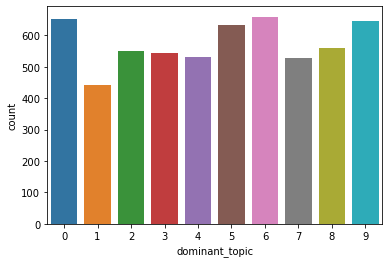

In [183]:
import seaborn as sns
sns.countplot(df_document_topic.dominant_topic)

**Gold Standard**

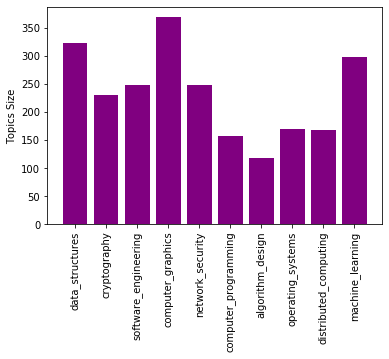

In [184]:
import matplotlib.pyplot as plt
gs=clean_corpus['gs']
gs.pop('o')
gs_termcounts=[]
core_concepts=[]
for core_concept in gs:
    core_concepts.append(core_concept)
    gs_termcounts.append(len(gs[core_concept]))
plt.bar(core_concepts,gs_termcounts,width=0.8,color='purple')
plt.xticks(rotation=90)
plt.ylabel("Topics Size")
plt.show()

In [186]:
label=labeled_corpus['label']
filtered_labels=[]
for i in range(len(vocab)):
    id,word=id2word[i]
    index=terms_list.index(word)
    filtered_labels.append(label[index])

**Clusters Formation**

In [187]:
clusters=[]
topics_terms=[]
for i in range(10):
    cluster=[]
    topic_terms={}
    for j in range(len(vocab)):
        row=df_document_topic_term.loc[j]
        if(row['dominant_topic']==i):
            cluster.append(row['terms'])
            topic_terms[row['terms']]=row[i]
    topics_terms.append(topic_terms)
    clusters.append(cluster)

In [188]:
#number of irrelevant terms in every cluster
for cluster in clusters: 
    count=0
    for term in cluster:
        for j in range(len(terms)):
            if (term==terms[j]):
                label=labels[j]
        if(label=='o'):
            count=count+1
    print(count)
 #number of  terms in every cluster
for cluster in clusters:
    print(len(cluster))

355
250
310
308
311
292
234
301
321
352
531
378
456
486
395
453
405
448
462
509


In [189]:
#determining measures of all terms
terms_saliency={}
for term in vocab:
    index=word2id[term]
    terms_saliency[term]=saliency[index]
df_terms=pd.DataFrame(vocab,columns=['Terms'])
df_terms['TF-IDF']=new_tfidf
df_terms['term counts']=word_counts
df_terms['Saliency']=terms_saliency.values()
print(df_terms)

                            Terms    TF-IDF  term counts  Saliency
0             linear_discriminant  0.016118           11 -0.000490
1                        accident  0.092058            5 -0.000388
2                healthy_subjects  1.058663            5 -0.000338
3                      smoothness  3.493588           11 -0.000672
4                        subjects  0.577453            5 -0.000507
...                           ...       ...          ...       ...
4518                         makd  2.540792            6 -0.000219
4519                        simit  1.111596            7 -0.000160
4520              memory_contents  0.317599            3 -0.000256
4521  computer_network_technology  1.587995            5 -0.000377
4522                  word_clouds  5.081583            8 -0.000130

[4523 rows x 4 columns]


**Word Cloud of Top N words in each topic**

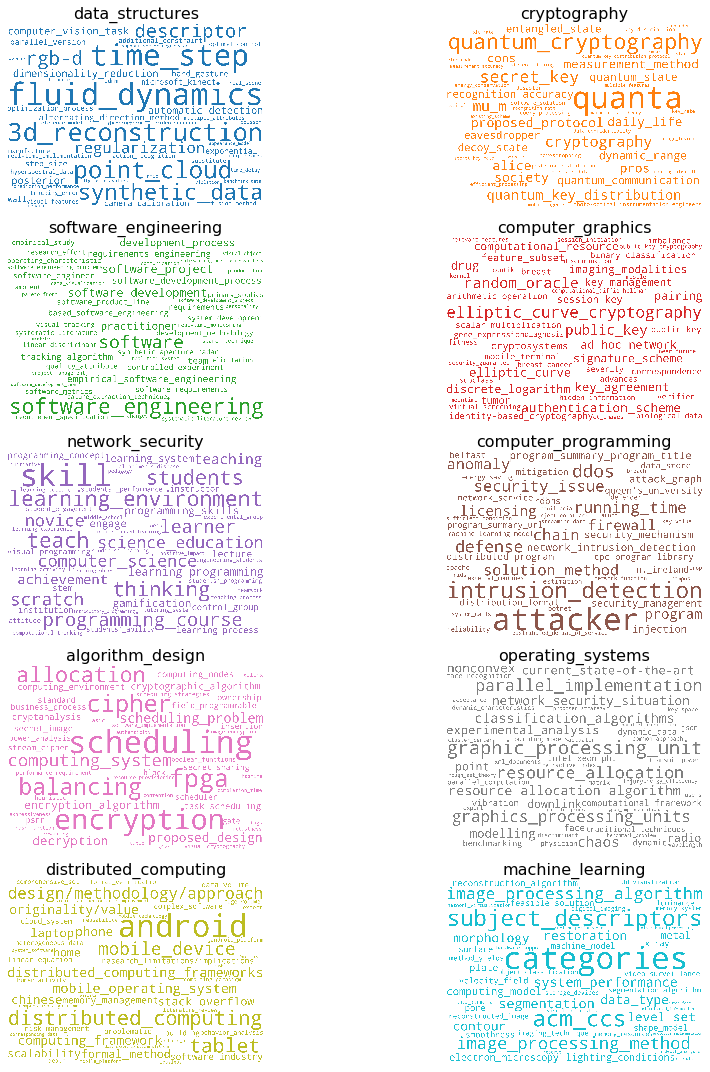

In [190]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=50,
                  colormap='Reds',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)
topics=['data_structures','cryptography','software_engineering','computer_graphics','network_security','computer_programming','algorithm_design','operating_systems','distributed_computing','machine_learning']

fig, axes = plt.subplots(5, 2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = topics_terms[i]
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title(topics[i], fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

**Evaluation (With and Without Gold Standard)**

In [191]:
features_matrix=model.topic_word_
features_matrix=features_matrix.transpose()

In [192]:
#computing silhouette of samples composed of features (freq,tf-idf,saliency)
y_pred_1=df_document_topic_term.dominant_topic.tolist()
from sklearn.metrics import silhouette_score
silhouette=silhouette_score(features_matrix,y_pred_1)
print(silhouette)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


-0.06134325074455297


In [193]:
from sklearn.metrics import calinski_harabasz_score
#computing calinski of samples composed of features (freq,tf-idf,saliency)
calinski_harabasz_score=calinski_harabasz_score(features_matrix,y_pred_1)
print(calinski_harabasz_score)

3.4520463287888856


In [194]:
#NB: Here I found that there is an error in one of the true labels in GS  so I corrected it.
for i in range(len(filtered_labels)):
    label=filtered_labels[i]
    if (label=='n'):
        print(i)
print(vocab[4208])
print(filtered_labels[4208])
print(len(filtered_labels))

4208
digital_fabrication
n
4523


In [195]:
filtered_labels[4208]='o'
y_pred=df_document_topic_term['dominant_topic']

In [196]:
labels_gs=[]
dictionary_label={'operating_systems':0,'network_security':1,'machine_learning':2,'data_structures':3,'cryptography':4,'distributed_computing':5,'computer_programming':6,'software_engineering':7,'computer_graphics':8,'algorithm_design':9,'o':10}
for label in filtered_labels:
    labels_gs.append(dictionary_label[label])
df_document_topic_term['gs label'] =labels_gs
df_document_topic_term.head()
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(labels_gs,df_document_topic_term['dominant_topic'])
print(conf_matrix)

[[ 13  13   7   8   6  13   8   4  11   3   0]
 [ 14  12  10   8  14  15   9  14  10  16   0]
 [ 17  13  20  16  26  21  20  16  22  13   0]
 [ 21  10  17  37   9  23  10   8  10  13   0]
 [ 11   7   3   7   6  14  21  15  10  14   0]
 [  5   7   5  10   9  15   8  10   9  16   0]
 [  9   9   4   6   5   5   5   4  17   8   0]
 [ 12   5  13   9  13  11  11  12   5  13   0]
 [ 16  11  21  28  20  21  30  28  23  20   0]
 [  4   3  17   8   1   3   6   8   5   9   0]
 [409 288 339 349 286 312 277 329 340 384   0]]


In [197]:
from sklearn.metrics import f1_score, precision_recall_fscore_support
y_pred=df_document_topic_term['dominant_topic']
p_macro, r_macro, f_macro, support_macro \
    = precision_recall_fscore_support(y_true=labels_gs, y_pred=y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10], average='macro')

p_micro, r_micro, f_micro, support_micro\
    = precision_recall_fscore_support(y_true=labels_gs, y_pred=y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10], average='micro')

print('macro: p {}, r {}, f1 {}'.format(p_macro, r_macro, f_macro))

print('micro: p {}, r {}, f1 {}'.format(p_micro, r_micro, f_micro))


macro: p 0.030101691409132218, r 0.11258954403862281, f1 0.04634099773220674
micro: p 0.03360601370771612, r 0.03360601370771612, f1 0.03360601370771612


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [198]:
from sklearn.metrics import adjusted_rand_score
rand_score=adjusted_rand_score(labels_gs,df_document_topic_term['dominant_topic'])
print(rand_score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:127: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


0.0009171387978584974


In [199]:
#computing pairwise precision
no_of_pairs=[]
for cluster in clusters:
    length=len(cluster)
    val=length*(length-1)/2
    no_of_pairs.append(val)
den=0
for value in no_of_pairs:
    den=den+value
num=0
for cluster in clusters:
    c=len(cluster)
    for i in range(c-1):
        for j in range(i+1,c):
            term1=cluster[i]
            term2=cluster[j]
            index1=terms.index(term1)
            index2=terms.index(term2)
            label1=labels[index1]
            label2=labels[index2]
            if(label1==label2):
                num=num+1
pairwise_precision=num/den
print(pairwise_precision)

0.47545495704678076


**Topic Coherence**

In [200]:
pip install gensim==3.8.3

  Using cached gensim-3.8.3-cp38-cp38-win_amd64.whl (24.2 MB)
  Using cached Cython-0.29.14-cp38-cp38-win_amd64.whl (1.7 MB)
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\__pycache__\\cython.cpython-38.pyc'
Consider using the `--user` option or check the permissions.



In [201]:
model1 = gensim.models.Word2Vec(docs, min_count = 1, 
                              vector_size = 100, window = 5)

INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:collected 8261 word types from a corpus of 124548 raw words and 5746 sentences
INFO:gensim.models.word2vec:Creating a fresh vocabulary
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 8261 unique words (100.0%% of original 8261, drops 0)', 'datetime': '2021-07-07T13:53:04.521973', 'gensim': '4.0.0', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'prepare_vocab'}
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 124548 word corpus (100.0%% of original 124548, drops 0)', 'datetime': '2021-07-07T13:53:04.526961', 'gensim': '4.0.0', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 

In [202]:
#computing topic coherence
import math
from sklearn.metrics.pairwise import cosine_similarity
def topic_coherence(topic):
        TC=0
        N=len(topic)
        for i in range(2,N):
            for j in range(1,i-1):
                cos_similarity=cosine_similarity(model1.wv[topic[i]].reshape(1,-1),model1.wv[topic[j]].reshape(1,-1))
                TC=TC+cos_similarity[0][0]
        Total_combinations=math.factorial(N)/(math.factorial(2)*math.factorial(N-2))
        TC=TC/Total_combinations
        return TC
TCS=[]
for cluster in clusters:
    TC=topic_coherence(cluster)
    TCS.append(TC)
print(TCS)
TC_average=0
for TC in TCS:
    TC_average=TC_average+TC
TC_average=TC_average/10
print(TC_average)


[0.9471979288210582, 0.9470850633804956, 0.9468604530736227, 0.9537403799914913, 0.944474691822852, 0.953778535356154, 0.9482010684434774, 0.9542731910499903, 0.9437504645249043, 0.9396610693868381]
0.9479022845850885
